In [14]:
import pandas as pd

# Votre fichier CSV
csv_file_path = '../data/dailyukflights.csv'

# Mapping des mois
mois_mapping = {
    'janv': '01',
    'févr': '02',
    'mars': '03',
    'avr': '04',
    'mai': '05',
    'juin': '06',
    'juil': '07',
    'août': '08',
    'sept': '09',
    'oct': '10',
    'nov': '11',
    'déc': '12'
}

# Charger le fichier CSV en utilisant pandas
df = pd.read_csv(csv_file_path, delimiter=';')

# Fonction pour convertir les dates
def convert_date(date_str):
    day, mois, year = date_str.split()
    return f'{year}-{mois_mapping[mois]}-{day}'

# Appliquer la conversion des dates
df['Date'] = df['Date'].apply(convert_date)

# Convertir la colonne 'Date' en format datetime
df['Date'] = pd.to_datetime(df['Date'])

#Convertir nb of flights en int
df['Number of flights'] = df['Number of flights'].str.replace('\D', '', regex=True).astype(int)

df = df.rename(columns={'Date': 'date', 'Number of flights': 'flights'})

# Afficher le DataFrame avec les dates modifiées
print(df)


           date  flights
0    2019-01-02     5147
1    2019-01-03     5518
2    2019-01-04     5588
3    2019-01-05     4798
4    2019-01-06     5329
...         ...      ...
1876 2024-02-21     4195
1877 2024-02-22     4775
1878 2024-02-23     5235
1879 2024-02-24     4575
1880 2024-02-25     4981

[1881 rows x 2 columns]


<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\D'
/var/folders/7_/fsqlqh31151bgv6379bb2tpc0000gn/T/ipykernel_67636/283282906.py:37: SyntaxWarning: invalid escape sequence '\D'
  df['Number of flights'] = df['Number of flights'].str.replace('\D', '', regex=True).astype(int)


In [15]:
print('type date : ',type(df['date'].values[0]))
print('type number : ',type(df['flights'].values[0]))

type date :  <class 'numpy.datetime64'>
type number :  <class 'numpy.int64'>


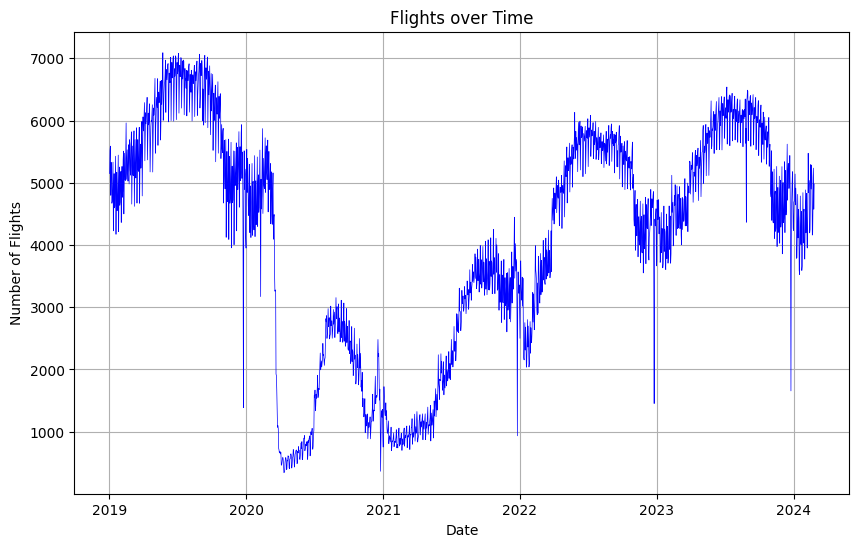

In [16]:
import matplotlib.pyplot as plt

# Tracer le graphique
plt.figure(figsize=(10, 6),dpi=100)
# Set 'date' column as index
df.set_index('date', inplace=True)

plt.plot(df.index, df['flights'], linestyle='-', color='b', linewidth=0.5)

# Ajouter des étiquettes et un titre
plt.title('Flights over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.grid(True)

# Afficher le graphique
plt.show()

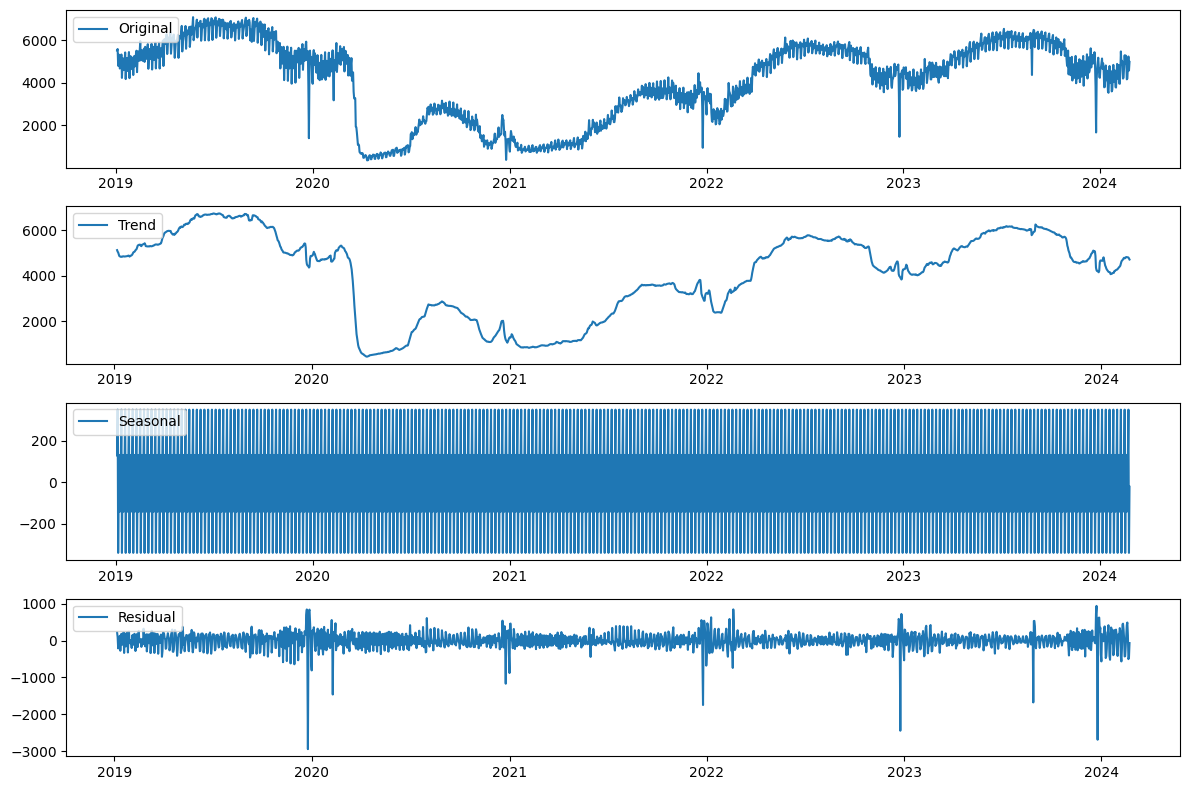

In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['flights'], model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['flights'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=50).mean()
    movingSTD = timeseries.rolling(window=50).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(10,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    elecom_test = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(elecom_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in elecom_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

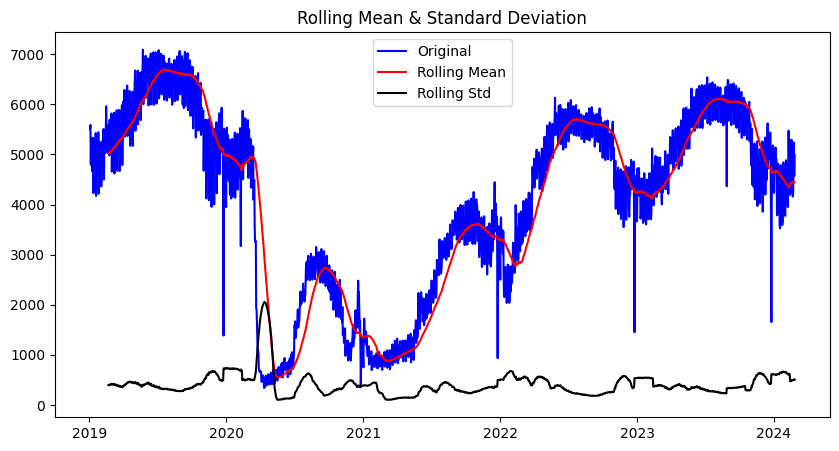

Results of Dickey Fuller Test:
Test Statistic                   -1.878178
p-value                           0.342395
#Lags Used                       21.000000
Number of Observations Used    1858.000000
Critical Value (1%)              -3.433874
Critical Value (5%)              -2.863097
Critical Value (10%)             -2.567599
dtype: float64


In [23]:
stationarity_check(df.flights)

obviously not stationary

make it stationary

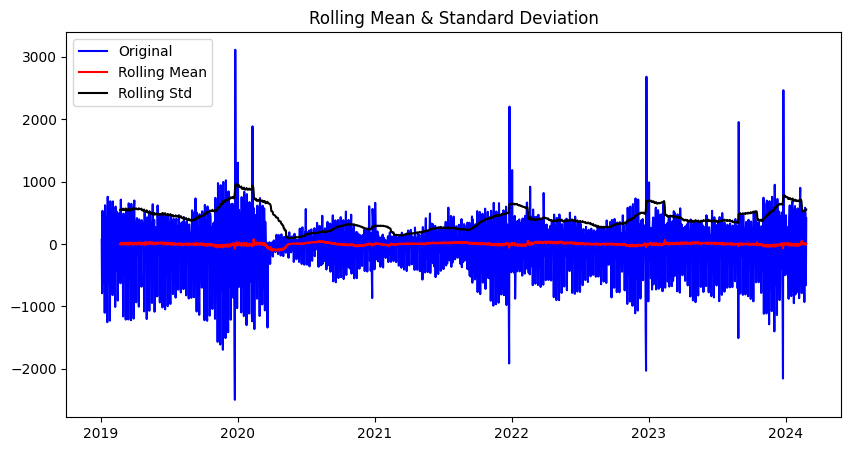

Results of Dickey Fuller Test:
Test Statistic                -7.773756e+00
p-value                        8.780057e-12
#Lags Used                     2.000000e+01
Number of Observations Used    1.858000e+03
Critical Value (1%)           -3.433874e+00
Critical Value (5%)           -2.863097e+00
Critical Value (10%)          -2.567599e+00
dtype: float64


In [24]:
# Differencing
df['flights_diff'] = df['flights'].diff()
df.dropna(inplace=True)

stationarity_check(df.flights_diff)